## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.409060  0.967413  0.946030 -1.186798 -0.668433 -1.301762
1 -1.305359 -1.311918  0.969231 -1.148332 -1.842313 -2.124428
2  0.262275 -1.398385  0.983714  0.945050  1.605601  0.279734
3  0.224162 -0.438668 -1.128551  0.926410  0.505500  0.849659
4 -1.236614  0.331781  0.072517 -0.175861  0.048945 -0.900279


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0254927	total: 65.2ms	remaining: 1m 5s
1:	learn: 1.0156574	total: 65.9ms	remaining: 32.9s
2:	learn: 1.0035015	total: 66.5ms	remaining: 22.1s
3:	learn: 0.9918171	total: 67.1ms	remaining: 16.7s
4:	learn: 0.9818901	total: 67.6ms	remaining: 13.5s
5:	learn: 0.9715898	total: 68.3ms	remaining: 11.3s
6:	learn: 0.9600570	total: 68.8ms	remaining: 9.76s
7:	learn: 0.9486794	total: 69.3ms	remaining: 8.59s
8:	learn: 0.9378538	total: 69.9ms	remaining: 7.69s
9:	learn: 0.9276517	total: 70.4ms	remaining: 6.97s
10:	learn: 0.9172760	total: 70.9ms	remaining: 6.37s
11:	learn: 0.9057649	total: 71.4ms	remaining: 5.88s
12:	learn: 0.8953287	total: 71.9ms	remaining: 5.46s
13:	learn: 0.8846798	total: 72.5ms	remaining: 5.11s
14:	learn: 0.8766772	total: 73.1ms	remaining: 4.8s
15:	learn: 0.8676650	total: 73.6ms	remaining: 4.53s
16:	learn: 0.8582451	total: 74.1ms	remaining: 4.28s
17:	learn: 0.8502121	total: 74.6ms	remaining: 4.07s
18:	learn: 0.8421720	total: 75.1ms	remaining:

90:	learn: 0.4145916	total: 109ms	remaining: 1.09s
91:	learn: 0.4105098	total: 109ms	remaining: 1.08s
92:	learn: 0.4069650	total: 110ms	remaining: 1.07s
93:	learn: 0.4032920	total: 110ms	remaining: 1.06s
94:	learn: 0.4000925	total: 111ms	remaining: 1.05s
95:	learn: 0.3967650	total: 111ms	remaining: 1.05s
96:	learn: 0.3934697	total: 112ms	remaining: 1.04s
97:	learn: 0.3905788	total: 112ms	remaining: 1.03s
98:	learn: 0.3870218	total: 112ms	remaining: 1.02s
99:	learn: 0.3841221	total: 113ms	remaining: 1.01s
100:	learn: 0.3802806	total: 113ms	remaining: 1.01s
101:	learn: 0.3774412	total: 114ms	remaining: 1s
102:	learn: 0.3745073	total: 114ms	remaining: 993ms
103:	learn: 0.3715408	total: 115ms	remaining: 987ms
104:	learn: 0.3686211	total: 115ms	remaining: 979ms
105:	learn: 0.3655608	total: 115ms	remaining: 972ms
106:	learn: 0.3626606	total: 116ms	remaining: 965ms
107:	learn: 0.3592557	total: 116ms	remaining: 959ms
108:	learn: 0.3562765	total: 117ms	remaining: 953ms
109:	learn: 0.3534257	tot

252:	learn: 0.1316290	total: 187ms	remaining: 553ms
253:	learn: 0.1308144	total: 188ms	remaining: 552ms
254:	learn: 0.1298596	total: 188ms	remaining: 550ms
255:	learn: 0.1292186	total: 189ms	remaining: 549ms
256:	learn: 0.1284487	total: 189ms	remaining: 547ms
257:	learn: 0.1278747	total: 190ms	remaining: 546ms
258:	learn: 0.1273216	total: 190ms	remaining: 544ms
259:	learn: 0.1265272	total: 191ms	remaining: 543ms
260:	learn: 0.1262736	total: 191ms	remaining: 542ms
261:	learn: 0.1253904	total: 192ms	remaining: 540ms
262:	learn: 0.1250571	total: 192ms	remaining: 539ms
263:	learn: 0.1242614	total: 193ms	remaining: 537ms
264:	learn: 0.1233474	total: 193ms	remaining: 535ms
265:	learn: 0.1225410	total: 194ms	remaining: 534ms
266:	learn: 0.1217904	total: 194ms	remaining: 532ms
267:	learn: 0.1210651	total: 194ms	remaining: 531ms
268:	learn: 0.1203315	total: 195ms	remaining: 530ms
269:	learn: 0.1197982	total: 196ms	remaining: 529ms
270:	learn: 0.1195273	total: 196ms	remaining: 527ms
271:	learn: 

476:	learn: 0.0504354	total: 292ms	remaining: 320ms
477:	learn: 0.0502481	total: 292ms	remaining: 319ms
478:	learn: 0.0500309	total: 293ms	remaining: 319ms
479:	learn: 0.0498186	total: 293ms	remaining: 318ms
480:	learn: 0.0495155	total: 294ms	remaining: 317ms
481:	learn: 0.0492013	total: 294ms	remaining: 316ms
482:	learn: 0.0490237	total: 295ms	remaining: 315ms
483:	learn: 0.0488185	total: 295ms	remaining: 315ms
484:	learn: 0.0485139	total: 295ms	remaining: 314ms
485:	learn: 0.0483007	total: 296ms	remaining: 313ms
486:	learn: 0.0481160	total: 296ms	remaining: 312ms
487:	learn: 0.0479348	total: 297ms	remaining: 311ms
488:	learn: 0.0477271	total: 297ms	remaining: 311ms
489:	learn: 0.0476170	total: 298ms	remaining: 310ms
490:	learn: 0.0475231	total: 298ms	remaining: 309ms
491:	learn: 0.0472470	total: 299ms	remaining: 309ms
492:	learn: 0.0469757	total: 299ms	remaining: 308ms
493:	learn: 0.0467271	total: 300ms	remaining: 307ms
494:	learn: 0.0464783	total: 300ms	remaining: 306ms
495:	learn: 

642:	learn: 0.0275034	total: 370ms	remaining: 206ms
643:	learn: 0.0274627	total: 371ms	remaining: 205ms
644:	learn: 0.0273464	total: 371ms	remaining: 204ms
645:	learn: 0.0272322	total: 372ms	remaining: 204ms
646:	learn: 0.0272123	total: 372ms	remaining: 203ms
647:	learn: 0.0271504	total: 373ms	remaining: 202ms
648:	learn: 0.0271309	total: 373ms	remaining: 202ms
649:	learn: 0.0270699	total: 373ms	remaining: 201ms
650:	learn: 0.0270506	total: 374ms	remaining: 200ms
651:	learn: 0.0269672	total: 374ms	remaining: 200ms
652:	learn: 0.0268551	total: 375ms	remaining: 199ms
653:	learn: 0.0267952	total: 375ms	remaining: 198ms
654:	learn: 0.0267361	total: 376ms	remaining: 198ms
655:	learn: 0.0267174	total: 376ms	remaining: 197ms
656:	learn: 0.0266592	total: 377ms	remaining: 197ms
657:	learn: 0.0265882	total: 377ms	remaining: 196ms
658:	learn: 0.0265498	total: 377ms	remaining: 195ms
659:	learn: 0.0264805	total: 378ms	remaining: 195ms
660:	learn: 0.0264042	total: 378ms	remaining: 194ms
661:	learn: 

855:	learn: 0.0150140	total: 476ms	remaining: 80.1ms
856:	learn: 0.0149834	total: 477ms	remaining: 79.5ms
857:	learn: 0.0149305	total: 477ms	remaining: 79ms
858:	learn: 0.0148800	total: 477ms	remaining: 78.4ms
859:	learn: 0.0148484	total: 478ms	remaining: 77.8ms
860:	learn: 0.0148146	total: 478ms	remaining: 77.2ms
861:	learn: 0.0147626	total: 479ms	remaining: 76.6ms
862:	learn: 0.0147101	total: 479ms	remaining: 76.1ms
863:	learn: 0.0146768	total: 480ms	remaining: 75.5ms
864:	learn: 0.0146299	total: 480ms	remaining: 74.9ms
865:	learn: 0.0146005	total: 481ms	remaining: 74.4ms
866:	learn: 0.0145411	total: 481ms	remaining: 73.8ms
867:	learn: 0.0145208	total: 482ms	remaining: 73.2ms
868:	learn: 0.0145006	total: 482ms	remaining: 72.7ms
869:	learn: 0.0144596	total: 482ms	remaining: 72.1ms
870:	learn: 0.0144382	total: 483ms	remaining: 71.5ms
871:	learn: 0.0143907	total: 484ms	remaining: 71ms
872:	learn: 0.0143257	total: 484ms	remaining: 70.4ms
873:	learn: 0.0142937	total: 485ms	remaining: 69.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

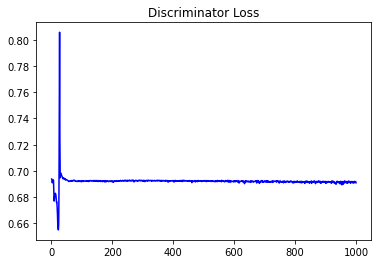

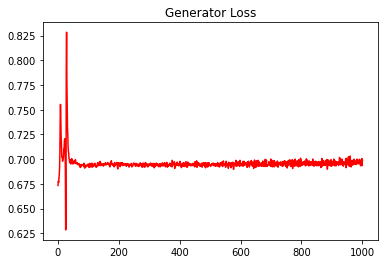

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10299572169930651


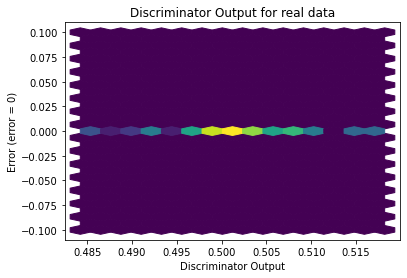

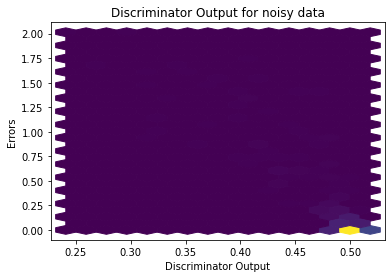

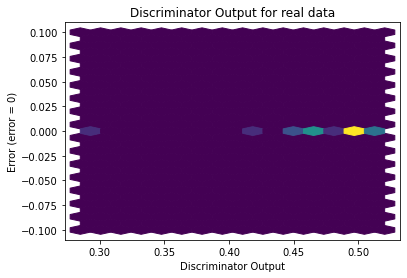

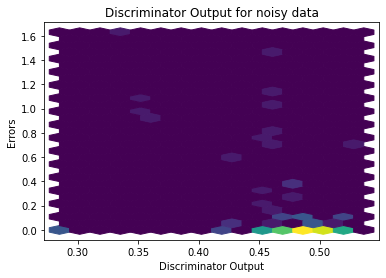

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


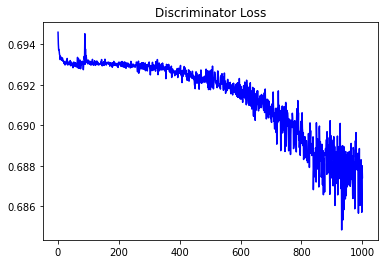

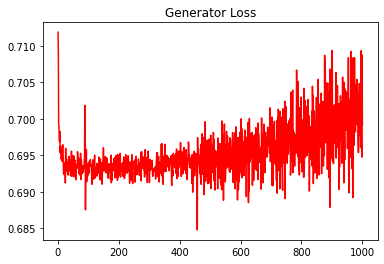

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14556118162629317


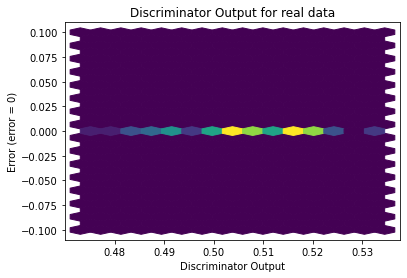

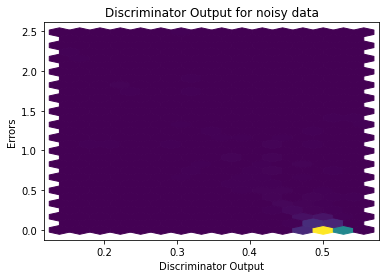

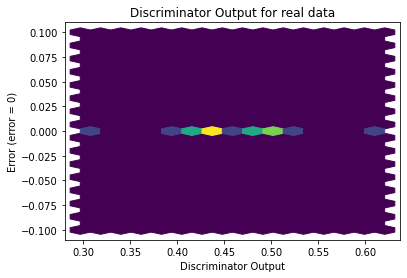

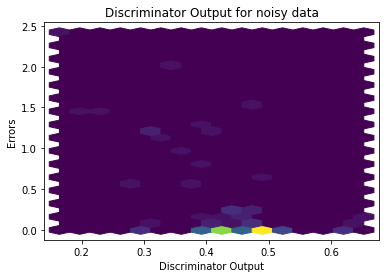

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1510]], requires_grad=True)
